In [9]:
from cleaned_nn1 import PlanarNeuralNetwork
from planar_utils import plot_decision_boundary, load_planar_dataset
import numpy as np

Cost after iteration 0: 0.6931125167719423
Cost after iteration 1000: 0.2825781062709596
Cost after iteration 2000: 0.2697771489412197
Cost after iteration 3000: 0.26231806209753844
Cost after iteration 4000: 0.24122763763977154
Cost after iteration 5000: 0.22602306763242697
Cost after iteration 6000: 0.22162096031401773
Cost after iteration 7000: 0.21890721724721857
Cost after iteration 8000: 0.21688489461015492
Cost after iteration 9000: 0.2152597281460529


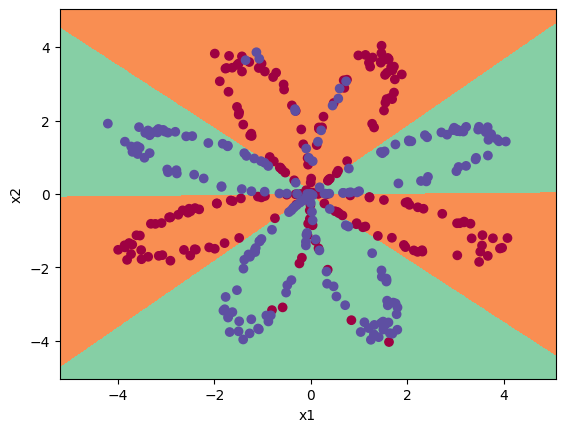

In [10]:
# Main execution
X, Y = load_planar_dataset()
nn = PlanarNeuralNetwork(n_x=2, n_h=4, n_y=1)
nn.train(X, Y, num_iterations=10000, print_cost=True)
plot_decision_boundary(nn, X, Y)


Cost after iteration 0: 0.6931891734981436
Cost after iteration 1000: 0.2766861482194042
Cost after iteration 2000: 0.26232622488793433
Cost after iteration 3000: 0.25447264348470244
Cost after iteration 4000: 0.2503572391560068
Cost after iteration 5000: 0.22435235136697776
Cost after iteration 6000: 0.2184401802615421
Cost after iteration 7000: 0.21562538421156183
Cost after iteration 8000: 0.21376110224769682
Cost after iteration 9000: 0.21241432178780822


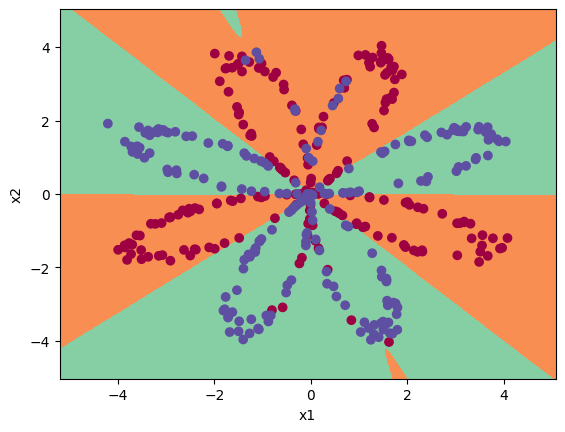

In [5]:
X, Y = load_planar_dataset()
nn = PlanarNeuralNetwork(n_x=2, n_h=5, n_y=1)
nn.train(X, Y, num_iterations=10000, print_cost=True)
plot_decision_boundary(nn, X, Y)
from planar_utils import load_extra_datasets
import numpy as np

# Load extra datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

# List of datasets
datasets = [noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure]
dataset_names = ['Noisy Circles', 'Noisy Moons', 'Blobs', 'Gaussian Quantiles', 'No Structure']

# Iterate through datasets
for data, name in zip(datasets, dataset_names):
    X, Y = data
    X, Y = X.T, Y.reshape(1, Y.shape[0])
    
    # Create and train the neural network
    nn = PlanarNeuralNetwork(n_x=2, n_h=5, n_y=1)
    nn.train(X, Y, num_iterations=10000, print_cost=True)
    
    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plot_decision_boundary(nn, X, Y)
    plt.title(f'Decision Boundary for {name} Dataset')
    plt.show()
    
    # Print accuracy
    predictions = nn.predict(X)
    accuracy = np.mean(predictions == Y)
    print(f'Accuracy for {name} dataset: {accuracy * 100:.2f}%\n')
from planar_utils import load_extra_datasets
import numpy as np

# Load extra datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

# List of datasets
datasets = [noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure]
dataset_names = ['Noisy Circles', 'Noisy Moons', 'Blobs', 'Gaussian Quantiles', 'No Structure']

# Iterate through datasets
for data, name in zip(datasets, dataset_names):
    X, Y = data
    X, Y = X.T, Y.reshape(1, Y.shape[0])
    
    # Create and train the neural network
    nn = PlanarNeuralNetwork(n_x=2, n_h=5, n_y=1)
    nn.train(X, Y, num_iterations=10000, print_cost=True)
    
    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plot_decision_boundary(nn, X, Y)
    plt.title(f'Decision Boundary for {name} Dataset')
    plt.show()
    
    # Print accuracy
    predictions = nn.predict(X)
    accuracy = np.mean(predictions == Y)
    print(f'Accuracy for {name} dataset: {accuracy * 100:.2f}%\n')
import numpy as np

class PlanarNeuralNetwork:
    def __init__(self, n_x, n_h, n_y, learning_rate=0.01):
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.learning_rate = learning_rate
        self.parameters = self.initialize_parameters()

    def initialize_parameters(self):
        np.random.seed(2)
        W1 = np.random.randn(self.n_h, self.n_x) * np.sqrt(2. / self.n_x)
        b1 = np.zeros((self.n_h, 1))
        W2 = np.random.randn(self.n_y, self.n_h) * np.sqrt(2. / self.n_h)
        b2 = np.zeros((self.n_y, 1))
        return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-np.clip(Z, -709, 709)))

    def forward_propagation(self, X):
        W1, b1 = self.parameters['W1'], self.parameters['b1']
        W2, b2 = self.parameters['W2'], self.parameters['b2']
        
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = self.sigmoid(Z2)
        
        cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
        return A2, cache

    def compute_cost(self, A2, Y):
        m = Y.shape[1]
        epsilon = 1e-15
        A2 = np.clip(A2, epsilon, 1 - epsilon)
        logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1 - Y)
        cost = - np.sum(logprobs) / m
        return cost

    def backward_propagation(self, X, Y, cache):
        m = X.shape[1]
        A1, A2 = cache['A1'], cache['A2']
        W2 = self.parameters['W2']
        
        dZ2 = A2 - Y
        dW2 = np.dot(dZ2, A1.T) / m
        db2 = np.sum(dZ2, axis=1, keepdims=True) / m
        dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
        dW1 = np.dot(dZ1, X.T) / m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m
        
        grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
        return grads

    def update_parameters(self, grads):
        for param in self.parameters.keys():
            self.parameters[param] -= self.learning_rate * grads["d" + param]

    def train(self, X, Y, num_iterations=10000, print_cost=False):
        np.random.seed(1)
        
        # Normalize input data
        X = (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)
        
        for i in range(num_iterations):
            A2, cache = self.forward_propagation(X)
            cost = self.compute_cost(A2, Y)
            grads = self.backward_propagation(X, Y, cache)
            
            # Gradient clipping
            for grad in grads.values():
                np.clip(grad, -1, 1, out=grad)
            
            self.update_parameters(grads)
            
            if print_cost and i % 1000 == 0:
                print(f"Cost after iteration {i}: {cost}")

    def predict(self, X):
        A2, _ = self.forward_propagation(X)
        return A2 > 0.5
import numpy as np

class PlanarNeuralNetwork:
    def __init__(self, n_x, n_h, n_y, learning_rate=0.01):
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.learning_rate = learning_rate
        self.parameters = self.initialize_parameters()

    def initialize_parameters(self):
        np.random.seed(2)
        W1 = np.random.randn(self.n_h, self.n_x) * np.sqrt(2. / self.n_x)
        b1 = np.zeros((self.n_h, 1))
        W2 = np.random.randn(self.n_y, self.n_h) * np.sqrt(2. / self.n_h)
        b2 = np.zeros((self.n_y, 1))
        return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-np.clip(Z, -709, 709)))

    def forward_propagation(self, X):
        W1, b1 = self.parameters['W1'], self.parameters['b1']
        W2, b2 = self.parameters['W2'], self.parameters['b2']
        
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = self.sigmoid(Z2)
        
        cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
        return A2, cache

    def compute_cost(self, A2, Y):
        m = Y.shape[1]
        epsilon = 1e-15
        A2 = np.clip(A2, epsilon, 1 - epsilon)
        logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1 - Y)
        cost = - np.sum(logprobs) / m
        return cost

    def backward_propagation(self, X, Y, cache):
        m = X.shape[1]
        A1, A2 = cache['A1'], cache['A2']
        W2 = self.parameters['W2']
        
        dZ2 = A2 - Y
        dW2 = np.dot(dZ2, A1.T) / m
        db2 = np.sum(dZ2, axis=1, keepdims=True) / m
        dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
        dW1 = np.dot(dZ1, X.T) / m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m
        
        grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
        return grads

    def update_parameters(self, grads):
        for param in self.parameters.keys():
            self.parameters[param] -= self.learning_rate * grads["d" + param]

    def train(self, X, Y, num_iterations=10000, print_cost=False):
        np.random.seed(1)
        
        # Normalize input data
        X = (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)
        
        for i in range(num_iterations):
            A2, cache = self.forward_propagation(X)
            cost = self.compute_cost(A2, Y)
            grads = self.backward_propagation(X, Y, cache)
            
            # Gradient clipping
            for grad in grads.values():
                np.clip(grad, -1, 1, out=grad)
            
            self.update_parameters(grads)
            
            if print_cost and i % 1000 == 0:
                print(f"Cost after iteration {i}: {cost}")

    def predict(self, X):
        A2, _ = self.forward_propagation(X)
        return A2 > 0.5
import numpy as np

class PlanarNeuralNetwork:
    def __init__(self, n_x, n_h, n_y, learning_rate=0.01):
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.learning_rate = learning_rate
        self.parameters = self.initialize_parameters()

    def initialize_parameters(self):
        np.random.seed(2)
        W1 = np.random.randn(self.n_h, self.n_x) * np.sqrt(2. / self.n_x)
        b1 = np.zeros((self.n_h, 1))
        W2 = np.random.randn(self.n_y, self.n_h) * np.sqrt(2. / self.n_h)
        b2 = np.zeros((self.n_y, 1))
        return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-np.clip(Z, -709, 709)))

    def forward_propagation(self, X):
        W1, b1 = self.parameters['W1'], self.parameters['b1']
        W2, b2 = self.parameters['W2'], self.parameters['b2']
        
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = self.sigmoid(Z2)
        
        cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
        return A2, cache

    def compute_cost(self, A2, Y):
        m = Y.shape[1]
        epsilon = 1e-15
        A2 = np.clip(A2, epsilon, 1 - epsilon)
        logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1 - Y)
        cost = - np.sum(logprobs) / m
        return cost

    def backward_propagation(self, X, Y, cache):
        m = X.shape[1]
        A1, A2 = cache['A1'], cache['A2']
        W2 = self.parameters['W2']
        
        dZ2 = A2 - Y
        dW2 = np.dot(dZ2, A1.T) / m
        db2 = np.sum(dZ2, axis=1, keepdims=True) / m
        dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
        dW1 = np.dot(dZ1, X.T) / m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m
        
        grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
        return grads

    def update_parameters(self, grads):
        for param in self.parameters.keys():
            self.parameters[param] -= self.learning_rate * grads["d" + param]

    def train(self, X, Y, num_iterations=10000, print_cost=False):
        np.random.seed(1)
        
        # Normalize input data
        X = (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)
        
        for i in range(num_iterations):
            A2, cache = self.forward_propagation(X)
            cost = self.compute_cost(A2, Y)
            grads = self.backward_propagation(X, Y, cache)
            
            # Gradient clipping
            for grad in grads.values():
                np.clip(grad, -1, 1, out=grad)
            
            self.update_parameters(grads)
            
            if print_cost and i % 1000 == 0:
                print(f"Cost after iteration {i}: {cost}")

    def predict(self, X):
        A2, _ = self.forward_propagation(X)
        return A2 > 0.5
